In [1]:
#Importing modules
import math,operator,collections
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
#Preprocessing the DataFrame
df=pd.read_csv("../data/preprocessed/Student_uwe.csv")
df = df.reset_index(drop = True)
df = df[df["Batch"]<2016]
df.reset_index(drop=True)
df.drop(['Unnamed: 0'],inplace=True,axis=1)
df.reset_index(drop=True)

,School,Major,Batch,Sem1_courses,Sem1_grades,Sem2_courses,Sem2_grades,Sem3_courses,Sem3_grades,Sem4_courses,Sem4_grades,Sem5_courses,Sem5_grades,Sem6_courses,Sem6_grades,Sem7_courses,Sem7_grades,Sem8_courses,Sem8_grades
0,School of Engineering,EED,2012,[],[],[],[],[],[],[],[],"["" 'ENG110'""]","["" 'C'""]","[""'HIS310'"", "" 'HIS103'""]","[""'B'"", "" 'C'""]","[""'MED309'"", "" 'CED206'""]","[""'C-'"", "" 'D'""]","[""'FAC101'""]","[""'C-'""]"
1,School of Engineering,EED,2012,[],[],[],[],[],[],[],[],"[""'ENG110'""]","[""'C-'""]",[],[],"["" 'MED309'"", "" 'CED206'"", "" 'ENG213'""]","["" 'D'"", "" 'D'"", "" 'D'""]","["" 'FAC101'""]","["" 'C-'""]"
2,School of Engineering,ECE,2012,[],[],[],[],[],[],[],[],"[""'BIO201'""]","[""'A-'""]",[],[],"[""'ADP212'""]","[""'A-'""]",NaN,NaN
3,School of Engineering,CED,2012,[],[],[],[],[],[],[],[],"["" 'HIS210'""]","["" 'F'""]","[""'HIS102'""]","[""'D'""]",NaN,NaN,NaN,NaN
4,School of Humanities & Soc Sci,ENG,2013,[],[],[],[],[],[],"[""'SOC103'""]","[""'F'""]","[""'SOC201'"", "" 'HIS107'""]","[""'F'"", "" 'F'""]",[],[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,School of Engineering,EED,2015,[],[],[],[],"["" 'OHM103'""]","["" 'B'""]","["" 'MEC102'""]","["" 'B'""]","[""'OHM401'"", "" 'FAC203'""]","[""'A-'"", "" 'B-'""]","["" 'DOM401'""]","["" 'A-'""]",NaN,NaN,NaN,NaN
490,School of Engineering,EED,2015,[],[],[],[],"["" 'ECO101'""]","["" 'C'""]","["" 'ECO102'""]","["" 'A-'""]","[""'ECO203'""]","[""'B'""]","[""'ECO375'"", "" 'ECO221'""]","[""'B-'"", "" 'B'""]",NaN,NaN,NaN,NaN
491,School of Humanities & Soc Sci,ECO,2015,[],[],"["" 'SOC203'""]","["" 'A-'""]","["" 'MAT390'""]","["" 'B'""]","[""'MAT110'"", "" 'MAT490'""]","[""'C'"", "" 'C'""]","[""'IRG208'"", "" 'SOC204'""]","[""'A-'"", "" 'A'""]","[""'SOC412'"", "" 'MAT283'"", "" 'SOC321'""]","[""'A-'"", "" 'A-'"", "" 'A-'""]",NaN,NaN,NaN,NaN
492,School of Engineering,CSD,2015,"[""'OHM101'""]","[""'B'""]","["" 'STM203'"", "" 'FAC101'"", "" 'ENG215'"", "" 'ENG...","["" 'C-'"", "" 'C-'"", "" 'B'"", "" 'A'""]",[],[],"[""'ENG326'""]","[""'B-'""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df

,School,Major,Batch,Sem1_courses,Sem1_grades,Sem2_courses,Sem2_grades,Sem3_courses,Sem3_grades,Sem4_courses,Sem4_grades,Sem5_courses,Sem5_grades,Sem6_courses,Sem6_grades,Sem7_courses,Sem7_grades,Sem8_courses,Sem8_grades
0,School of Engineering,EED,2012,[],[],[],[],[],[],[],[],"["" 'ENG110'""]","["" 'C'""]","[""'HIS310'"", "" 'HIS103'""]","[""'B'"", "" 'C'""]","[""'MED309'"", "" 'CED206'""]","[""'C-'"", "" 'D'""]","[""'FAC101'""]","[""'C-'""]"
1,School of Engineering,EED,2012,[],[],[],[],[],[],[],[],"[""'ENG110'""]","[""'C-'""]",[],[],"["" 'MED309'"", "" 'CED206'"", "" 'ENG213'""]","["" 'D'"", "" 'D'"", "" 'D'""]","["" 'FAC101'""]","["" 'C-'""]"
2,School of Engineering,ECE,2012,[],[],[],[],[],[],[],[],"[""'BIO201'""]","[""'A-'""]",[],[],"[""'ADP212'""]","[""'A-'""]",NaN,NaN
3,School of Engineering,CED,2012,[],[],[],[],[],[],[],[],"["" 'HIS210'""]","["" 'F'""]","[""'HIS102'""]","[""'D'""]",NaN,NaN,NaN,NaN
4,School of Humanities & Soc Sci,ENG,2013,[],[],[],[],[],[],"[""'SOC103'""]","[""'F'""]","[""'SOC201'"", "" 'HIS107'""]","[""'F'"", "" 'F'""]",[],[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,School of Engineering,EED,2015,[],[],[],[],"["" 'OHM103'""]","["" 'B'""]","["" 'MEC102'""]","["" 'B'""]","[""'OHM401'"", "" 'FAC203'""]","[""'A-'"", "" 'B-'""]","["" 'DOM401'""]","["" 'A-'""]",NaN,NaN,NaN,NaN
491,School of Engineering,EED,2015,[],[],[],[],"["" 'ECO101'""]","["" 'C'""]","["" 'ECO102'""]","["" 'A-'""]","[""'ECO203'""]","[""'B'""]","[""'ECO375'"", "" 'ECO221'""]","[""'B-'"", "" 'B'""]",NaN,NaN,NaN,NaN
492,School of Humanities & Soc Sci,ECO,2015,[],[],"["" 'SOC203'""]","["" 'A-'""]","["" 'MAT390'""]","["" 'B'""]","[""'MAT110'"", "" 'MAT490'""]","[""'C'"", "" 'C'""]","[""'IRG208'"", "" 'SOC204'""]","[""'A-'"", "" 'A'""]","[""'SOC412'"", "" 'MAT283'"", "" 'SOC321'""]","[""'A-'"", "" 'A-'"", "" 'A-'""]",NaN,NaN,NaN,NaN
493,School of Engineering,CSD,2015,"[""'OHM101'""]","[""'B'""]","["" 'STM203'"", "" 'FAC101'"", "" 'ENG215'"", "" 'ENG...","["" 'C-'"", "" 'C-'"", "" 'B'"", "" 'A'""]",[],[],"[""'ENG326'""]","[""'B-'""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


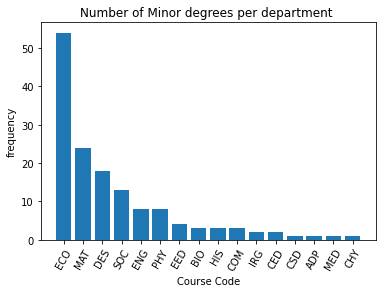

<Figure size 360x216 with 0 Axes>

' Function that takes in the major and \nsemester as input and returns the courses that one can take in that \nsemester pertaining to the minor one demands\n'

In [4]:
#minorList contains the minor, if any, for the student.
minorList=[]

This loop will end up creating a list of all the Minors, named minorList.
for i,rows in df.iterrows():
    masterListCourses = []
    d=dict()
    for k in range(2,16,2):
        l=[]
        x=rows[k]
        print(x)
        if(x!="[]"):
            x=x[1:len(x)-1]
            x=x.split(",")
            for i in x:
                l.append(i.strip()[1:4])
        masterListCourses+=l

    if(len(masterListCourses) < 5):
        minorList.append("")
        continue
    
    for course in masterListCourses:
        if(list(d.keys()).__contains__(course[0:3])):
            d[course[0:3]]+=1
        else:
            d[course[0:3]]=1

    if(len(d.keys())!=0 and (int(rows[-1])<2015 and max(d.values())>=5 or int(rows[-1])==2015 and max(d.values())>=4)):
        minorCode = max(d.items(), key=operator.itemgetter(1))[0]
        minorList.append(minorCode)
    else:
        minorList.append("")

# #Adding the column named Minor for every student
df["Minor"] =  minorList


# #Drop the rows where there is no Minor.
df = df[df["Minor"] != ""]
# print(len(df))


# #Convert the dataframe to csv format
df.to_csv('Student_uwe_minors.csv',sep=',', encoding='utf-8',header=True)

# df=pd.read_csv('../data/preprocessed/Student_uwe_minors.csv')

MinorFrequency = collections.Counter(df["Minor"])
MinorFrequency = OrderedDict(MinorFrequency.most_common())



'''Plotting the domains vs freq of students who minored in them'''
plt.ylabel('frequency')
plt.title('Number of Minor degrees per department ')
plt.xlabel('Course Code')
plt.bar(range(len(MinorFrequency)), list(MinorFrequency.values()), align='center')
plt.xticks(range(len(MinorFrequency)), list(MinorFrequency.keys()),rotation=60)
plt.figure(figsize=(5, 3))
plt.show()



'''Function that takes in the major as input and returns the 
freq of ppl who minored in what domains in that major.
'''
def majorWiseMinor(df,major):
    df1 = df[df["Major"] == major]
    minorFreq = collections.Counter(df1["Minor"])
    minorFreq = OrderedDict(minorFreq.most_common())
    plt.ylabel('frequency')
    plt.title('Minor degree paths chosen by stream:'+major)
    plt.xlabel("Domain:"+major)
    plt.bar(range(len(minorFreq)), list(minorFreq.values()), align='center', color="green")
    plt.xticks(range(len(minorFreq)), list(minorFreq.keys()),rotation=60)
    plt.figure(figsize=(5, 3))
    plt.show()
    return minorFreq
    

'''Function that takes in the major and semester as 
input and returns the courses that one can take in that 
semester (most commonly taken UWEs).
'''
def majorWiseMinorCourses(df,major,semester):
    df1 = df[df["Major"] == major]
    columnNo = 2*semester
    minorFreq = collections.Counter(df1["Minor"])
    df2 = df1.iloc[: , [columnNo]]
    df2.reset_index(drop=True)
    minor = max(minorFreq, key=minorFreq.get)
    coursesFreq = dict()
    for i,row in df2.iterrows():
        row[0][1:]
        courses = [i.strip()[1:-1] for i in row[0][1:len(row[0])-1].split(",")]    
        for i in courses:
            if i in coursesFreq.keys():
                coursesFreq[i] += 1
            else:
                coursesFreq[i] = 1
    print(coursesFreq)
        




''' Function that takes in the major and 
semester as input and returns the courses that one can take in that 
semester pertaining to the minor one demands
'''

# def majorWiseMinorCoursesGivenMinor(df,major,minor,semester):
#     df1 = df[df["Major"] == major]
#     columnNo = 2*semester
#     df2 = df1.iloc[: , [columnNo]]
#     df2.reset_index(drop=True)
#     coursesFreq = dict()
#     for i,row in df2.iterrows():
#         row[0][1:]
#         courses = [i.strip()[1:-1] for i in row[0][1:len(row[0])-1].split(",")]  
#         print(courses)
#         for i in courses:
#             if i.startswith(minor):
#                 if i in coursesFreq.keys():
#                     coursesFreq[i] += 1
#                 else:
#                     coursesFreq[i] = 1
#     print(coursesFreq)
        


    

# CONCLUSION:
- Above, we see that people from `ECO` department pursue Minor degree, followed by `MAT` department and the least number of students pursue a Minor degree from dept `CHY`

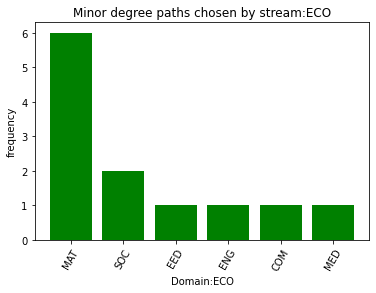

<Figure size 360x216 with 0 Axes>

OrderedDict([('MAT', 6),
             ('SOC', 2),
             ('EED', 1),
             ('ENG', 1),
             ('COM', 1),
             ('MED', 1)])

In [5]:
# Suggestion for Minor degree path for a particular Major

majorWiseMinor(df,"ECO")


# CONCLUSION:
- Above, we can see that students from `ECO` (Economics) dept choose to pursue Minor degree in `MAT` which is Mathematics, which is reasonable as Maths and Eco gel well together and opens good career opportunities ahead.
- Similarly, we can find out insights for all kinds of departments, which will be helpful for the students in deciding which Minor degrees to pursue and enhance their careers